In [1]:
import sys 
import os
import glob
import cv2 
import pywt
from google.colab.patches import cv2_imshow


In [2]:
def load_images(directory):
  images = []
  image_files = glob.glob(os.path.join(directory, '*.bmp'))
  for image_file in image_files:
    images.append(image_file)
  return images



In [3]:
dataset = load_images('/content/drive/MyDrive/bbb')

In [4]:
dataset[0]

'/content/drive/MyDrive/bbb/resized_biblioteca_X_160_Y_440.bmp'

In [5]:
import numpy as np

In [6]:
image = cv2.imread('image.bmp')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

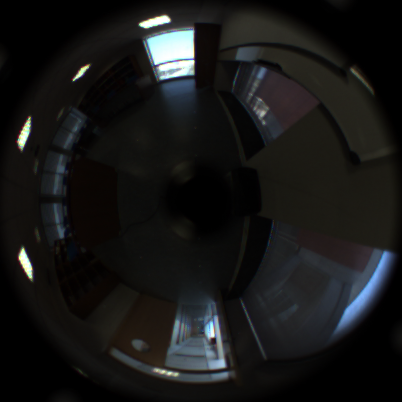

In [7]:
cv2_imshow(image)

In [10]:
import cv2
import numpy as np

def compute_combined_descriptors(image):
    
    orb = cv2.ORB_create()

   
    keypoints, descriptors = orb.detectAndCompute(image, None)

    return descriptors


query_image = cv2.imread('image.bmp', cv2.IMREAD_GRAYSCALE)


query_combined_descriptors = compute_combined_descriptors(query_image)
query_combined_descriptors_sum = np.sum(query_combined_descriptors, axis=0)


scores = []


for image_path in dataset:
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    
    combined_descriptors = compute_combined_descriptors(image)
    combined_descriptors_sum = np.sum(combined_descriptors, axis=0)

    
    score = compute_score(query_combined_descriptors_sum, combined_descriptors_sum)

    
    scores.append(score)


scores = np.array(scores)




In [11]:
def compute_score(M, N):
    numerator = np.dot(M, N)
    denominator = np.linalg.norm(M) ** 2 + np.linalg.norm(N) ** 2 - numerator
    score = numerator / denominator
    return score


print("Scores:")
print(scores)
len(scores)


Scores:
[0.99724541 0.99641804 0.99470057 0.9741045  0.88616321 0.99274168
 0.99587748 0.99605449 0.93858786 0.98886782 0.99416131 0.99581656
 0.9458137  0.98274554 0.89364454 0.9886461  0.99375413 0.93234505
 0.99185585 0.97937056 0.99560696 0.99490843 0.96074949 0.98841213
 0.995023   0.99634969 0.9950943  0.99735772 0.93938552 0.96239808
 0.9877003  0.99574648 0.98631319 0.98779445 0.99114491 0.96564797
 0.97747422 0.98909657 0.97754943 0.99077253 0.97744584 0.98857732
 0.9933932  0.97352532 0.99263185 0.99135739 0.99511241 0.97134045
 0.98872363 0.97276356 0.99138925 0.97889364 0.99662591 0.99477457
 0.988043   0.96807401 0.98389265 0.98833584 0.96596923 0.98232686
 0.98596698 0.96221347 0.96776955 0.97383038 0.97203641 0.96624249
 0.96887735 0.96229326 0.97067531 0.96111215 0.9759287  0.97075709
 0.97011169 0.9750664  0.98256698 0.9600509  0.97033014 0.96414048
 0.96391677 0.96575198 0.95414287 0.95550848 0.96016345 0.97812073
 0.97750996 0.96704421 0.9790522  0.96659995 0.9566893

109

In [12]:
top_indices = np.argsort(scores)[-5:]

print("Top 5 Scores:")
for index in top_indices:
    print("Index:", index, "Score:", scores[index])

Top 5 Scores:
Index: 25 Score: 0.9963496939039389
Index: 1 Score: 0.9964180364873318
Index: 52 Score: 0.9966259073132188
Index: 0 Score: 0.9972454052502574
Index: 27 Score: 0.9973577201611556


In [13]:
top_indices

array([25,  1, 52,  0, 27])

In [ ]:

top_images = []
for index in top_indices:
    image_path = dataset[index]
    image = cv2.imread(image_path)
    top_images.append(image)


top_images_tuple = tuple(top_images)


print("Top 5 Images Tuple:")
print(top_images_tuple)


In [15]:

top_image_filenames = []
for index in top_indices:
    image_path = dataset[index]
    image_filename = os.path.basename(image_path)
    top_image_filenames.append(image_filename)


top_image_filenames_tuple = tuple(top_image_filenames)


print("Top 5 Image Filenames Tuple:")
print(top_image_filenames_tuple)


Top 5 Image Filenames Tuple:
('resized_biblioteca_X_160_Y_360.bmp', 'resized_biblioteca_X_160_Y_320.bmp', 'resized_biblioteca_X_360_Y_600.bmp', 'resized_biblioteca_X_160_Y_440.bmp', 'resized_biblioteca_X_120_Y_320.bmp')


In [16]:
top_image_filenames

['resized_biblioteca_X_160_Y_360.bmp',
 'resized_biblioteca_X_160_Y_320.bmp',
 'resized_biblioteca_X_360_Y_600.bmp',
 'resized_biblioteca_X_160_Y_440.bmp',
 'resized_biblioteca_X_120_Y_320.bmp']

In [17]:
print(top_image_filenames_tuple)

('resized_biblioteca_X_160_Y_360.bmp', 'resized_biblioteca_X_160_Y_320.bmp', 'resized_biblioteca_X_360_Y_600.bmp', 'resized_biblioteca_X_160_Y_440.bmp', 'resized_biblioteca_X_120_Y_320.bmp')


In [52]:
path = '/content/drive/MyDrive/bbb/'





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [49]:



query_image = cv2.imread('/content/image.bmp')
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)


orb = cv2.ORB_create()


query_keypoints, query_descriptors = orb.detectAndCompute(query_gray, None)


candidate_images =top_image_filenames_tuple




similarity_scores = []

In [66]:
path = '/content/drive/MyDrive/bbb/'
candidate_images = list(candidate_images)
for i in range(len(candidate_images)):
   candidate_images[i] = path+candidate_images[i]

[1, 2, 0, 0, 0]
1
😊😊😊😊😊 /content/drive/MyDrive/bbb/resized_biblioteca_X_160_Y_320.bmp


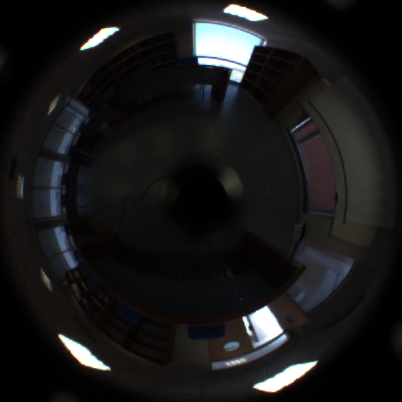

In [67]:
similarity_scores = []

for candidate_image_path in candidate_images:
    candidate_image = cv2.imread(candidate_image_path)

    candidate_gray = cv2.cvtColor(candidate_image, cv2.COLOR_BGR2GRAY)

    
    candidate_keypoints, candidate_descriptors = orb.detectAndCompute(candidate_gray, None)
    # print(candidate_keypoints,candidate_descriptors)
    # print(len(candidate_descriptors))

    
    bf = cv2.BFMatcher() 
    matches = bf.knnMatch(query_descriptors,candidate_descriptors,k=2)
 

    good_matches = []
    for m, n in matches:
        if m.distance < 0.6 * n.distance:
            good_matches.append(m)

    
    similarity_score = len(good_matches)
    # print(similarity_score)
    similarity_scores.append(similarity_score) 
print(similarity_scores)
retrieval_result_index = np.argmax(similarity_scores)
print(retrieval_result_index)
retrieval_result_image = cv2.imread(candidate_images[retrieval_result_index])
print("😊😊😊😊😊",candidate_images[1])
cv2_imshow(retrieval_result_image)

retrieval_result_image_keypoints,retrieval_result_image_descriptors= orb.detectAndCompute(retrieval_result_image, None)
    

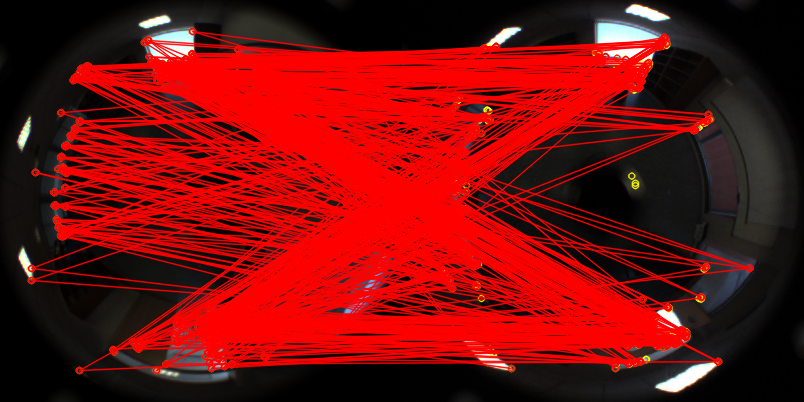

the number of good mathchess are 2


In [69]:
Matched = cv2.drawMatchesKnn(query_image,
                             query_keypoints,
                             retrieval_result_image,
                             retrieval_result_image_keypoints,
                            matches,
                            outImg=None,
                            matchColor=(0, 0, 255),
                            singlePointColor=(0, 255, 255),
                                
                           flags=0
                                )
cv2_imshow(Matched)
print("the number of good mathchess are",similarity_scores[np.argmax(similarity_scores)])